In [9]:
from stereo_helper import *
from matplotlib import pyplot as plt

import cv2
import time
import numpy as np

ModuleNotFoundError: No module named 'cv2'

## Test Dummy generated image

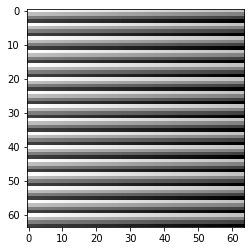

In [2]:
dummy = dummy_image()
plt.imshow(dummy, cmap=plt.cm.binary)

## Test the padding

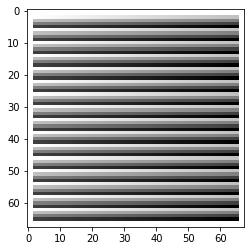

In [3]:
block = 5
padded = padding_image(dummy, block)
plt.imshow(padded, cmap=plt.cm.binary)

assert padded.shape == (68,68)

### Test the patch extraction

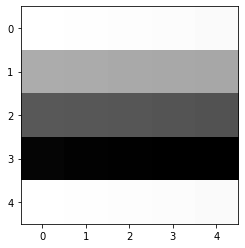

In [4]:
pos = (2, 2)
block = 5
patch = extract_patch(padded, pos, block)

plt.imshow(patch, cmap=plt.cm.binary)

assert patch.shape == (5, 5)
assert patch[0, 0] == 0
assert patch[0, 1] == 1

## Test split images in patches

In [5]:
patches, w, h = split_images_in_patches(padded, block)

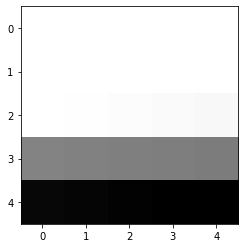

In [6]:
plt.imshow(patches[:,:,2], cmap=plt.cm.binary)

In [7]:
la1 = patches[:,:,1]
np.sum(la1)

786.0

In [8]:
a= np.sum(np.sum(patches, axis=1), axis=0).reshape(-1,1)

In [9]:
a.shape
np.reshape(a, (64, 64))

array([[ 585.,  786.,  990., ..., 1875., 1506., 1134.],
       [1164., 1560., 1960., ..., 3140., 2520., 1896.],
       [1167., 1566., 1970., ..., 3445., 2766., 2082.],
       ...,
       [1743., 2334., 2930., ..., 4405., 3534., 2658.],
       [1164., 1560., 1960., ..., 3140., 2520., 1896.],
       [1161., 1554., 1950., ..., 2835., 2274., 1710.]])

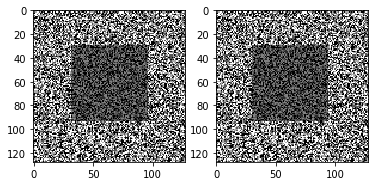

In [11]:
# Read images
left_image = cv2.bitwise_not(cv2.imread("input/pair0-L.png", 0))
right_image = cv2.bitwise_not(cv2.imread("input/pair0-R.png", 0))

fig, (imgL, imgR) = plt.subplots(1, 2)
imgL.imshow(left_image, cmap = plt.cm.binary)
imgR.imshow(right_image, cmap = plt.cm.binary)

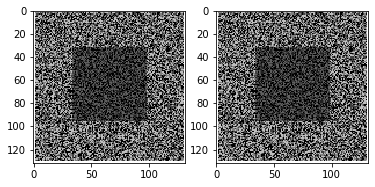

In [28]:
block = 5
padded_left_image = padding_image(left_image, block)
padded_right_image = padding_image(left_image, block)

fig, (imgL, imgR) = plt.subplots(1, 2)
imgL.imshow(padded_left_image, cmap = plt.cm.binary)
imgR.imshow(padded_right_image, cmap = plt.cm.binary)

In [26]:
right_image_patches, w, h = split_images_in_patches(padded_right_image, block)
right_image_patches.shape

(3, 3, 16384)

In [165]:
patch_left = extract_patch(padded_left_image, (0, 1), 3)
red_left = np.sum(patch_left)
red_left

254

In [166]:
t_right_patches, w, h = split_images_in_patches(padded_right_image, 3)
red_patches = reduce_patches(t_right_patches[:,:,0:128])

In [167]:
ssd = (red_patches - red_left) ** 2
np.argmin(ssd)

1

In [168]:
def best_match_x(patch, patches, cols, row):
    patch_size = patch.shape
    begin = row*cols
    end = begin+cols
    stripe = patches[:,:,begin:end]    
    reduce_stripe = reduce_patches(stripe)
    reduce_patch = np.sum(patch)
    diffs = (reduce_stripe - reduce_patch) ** 2
    return np.argmin(diffs)

In [248]:
def disparity_ssd(left, right):
    
    block = 5
    
    # pad the images
    padded_left = padding_image(left, block)
    padded_right = padding_image(right, block)

    right_patches, width, height = split_images_in_patches(padded_right, block)
    
    disparities = np.zeros((height, width))
    
    for y in range(height):
        for x in range(width):
            patch_left = extract_patch(padded_left, (x, y), block)
            best_x = best_match_x(patch_left, right_patches, width, y)

            disparities[y][x] = x - best_x
    
    return disparities

In [242]:
def normalize(matrix):
    return (matrix-np.min(matrix))/(np.max(matrix)-np.min(matrix))

In [243]:
D_L = disparity_ssd(left_image, right_image)
#D_L

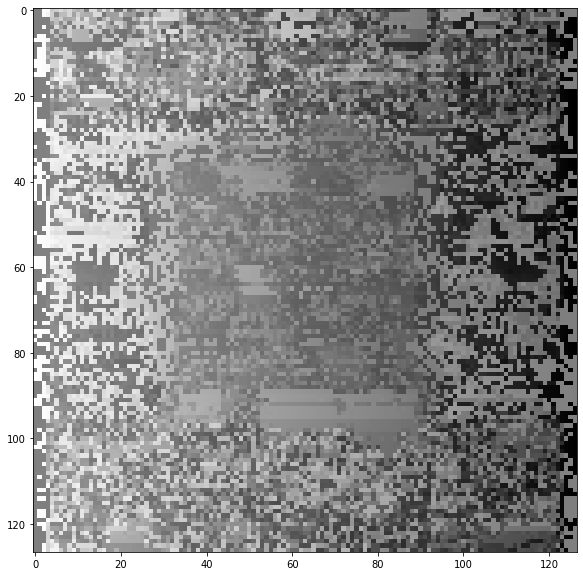

In [244]:
plt.imshow(normalize(D_L), cmap=plt.cm.binary)

Populating the interactive namespace from numpy and matplotlib


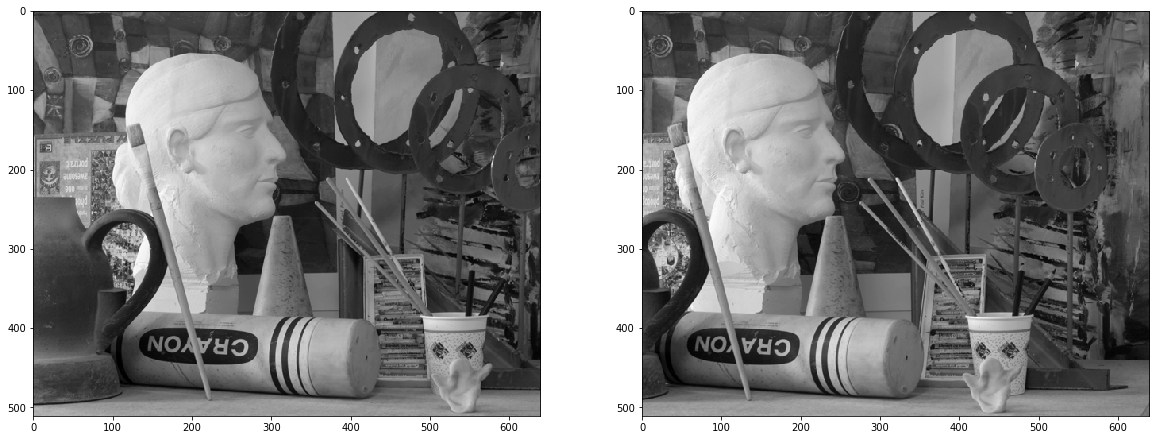

In [245]:
left_image_2 = cv2.bitwise_not(cv2.imread("input/pair1-L.png", 0))
right_image_2 = cv2.bitwise_not(cv2.imread("input/pair1-R.png", 0))

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

fig, (imgL, imgR) = plt.subplots(1, 2)
imgL.imshow(left_image_2, cmap = plt.cm.binary)
imgR.imshow(right_image_2, cmap = plt.cm.binary)

In [246]:
start = time.time()
D_L_2 = disparity_ssd(left_image_2, right_image_2)
end = time.time()
print("Elapsed time: "+str(end-start) + " seconds")

Elapsed time: 23.02826714515686 seconds


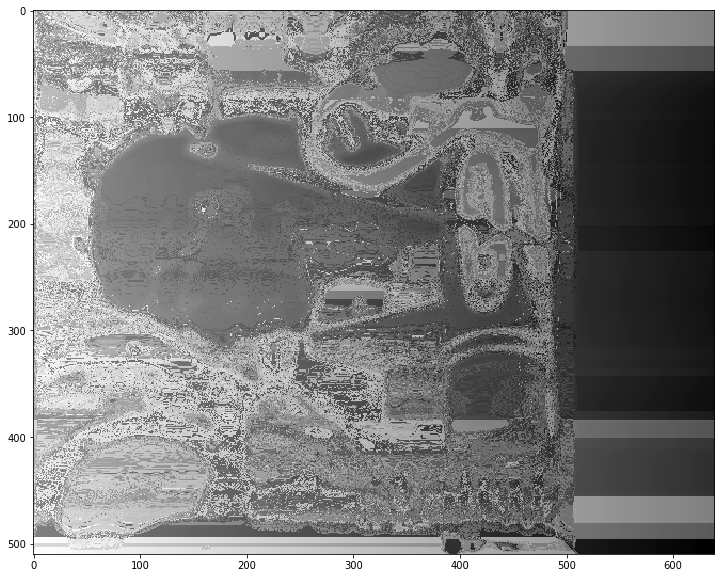

In [247]:
plt.imshow(D_L_2, cmap=plt.cm.binary)

In [2]:
import numpy as np

In [3]:
a = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[11, 12, 13], [14, 15, 16], [17, 18, 19]]])
a

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]]])

In [4]:
a.shape

(2, 3, 3)

In [5]:
b = np.array([[2, 4, 6], [8, 10, 12], [15, 18, 20]])
b

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [15, 18, 20]])

In [6]:
b.shape

(3, 3)

In [7]:
c = a - b

In [8]:
c

array([[[ -1,  -2,  -3],
        [ -4,  -5,  -6],
        [ -8, -10, -11]],

       [[  9,   8,   7],
        [  6,   5,   4],
        [  2,   0,  -1]]])